In [57]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools
from IPython.display import HTML
import charts_helper

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Problem Statement
Performing an efficient management of budget and securing accuracy are key points when using crowdsourcing. In classification scenarios the crowd sometimes can be noisy and generate a lack of concensus over tasks. The majority of the state-of-art approaches set a fixed number of votes per item and aggregate the votes with some criteria, this produces a reduction in the quality and an increment of costs. For this reason we present a smart detection algorithm which predicts the best decision between stop or continue collecting votes over a task and analyze its efficiency with different experiments.

Formalizing the problem, given a set of items $I$, a set of votes $V$, a classification function $fn$, a classification threshold $th$ and a cost ratio for crowd to expert vote cost $cr$, for each item we want to find the minimum amount of votes needed to take the decision of continue collecting votes or switch to an expert vote. For this we describe a smart stopping algorithm. 

## Metrics: 
 - **Classification cost** Each vote has a cost (assumed to be 1), and we compute the total cost for classifying all items
 - **Weighted classificaiton error = (fpc * FP + fnc * FN + ucc*UC)/N** FP= false positives, FB = false negatives, UC= items left unclassified, N= total number of items on which we reached a decision (or a decision to leave them unclassified), fpc= false positive cost, fnc = false negative cost, ucc=unclassified cost. Notice that loss here is INDEPENDENT of the cost
 - **Precision and Recall, F1, Fbeta**


### Approaches

- **Adaptive MV**: no workers accuracy estimation, it uses Majority Voting to predict classification

- **Adaptive EM**: workers accuracy estimation using EM and bayesian rule to predict classification

### AEM vs AMV

In [68]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.5

thresholds = adaptive.threshold.unique()
xticks_names = ('AMV (cr=1/20)', 'AMV (cr=1/10)','AMV (cr=1/5)','AEM (cr=1/20)', 'AEM (cr=1/10)','AEM (cr=1/5)' )
items = len(xticks_names)

adaptive_mv_05 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

adaptive_mv_1 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]

adaptive_mv_2 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]

adaptive_em_05 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

adaptive_em_1 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]

adaptive_em_2 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]

aux_elems = [adaptive_mv_05, adaptive_mv_1, adaptive_mv_2, adaptive_em_05, adaptive_em_1, adaptive_em_2]

elems = []
cost_column = 'cost'
cost_std_column = 'cost_std'
for elem in aux_elems:
    #elem[cost_column] = elem[cost_column].apply(lambda x: x/0.05/1000)
    #elem[cost_std_column] = elem[cost_std_column].apply(lambda x: x/0.05/1000)
    
    elem[cost_column] = elem.apply(lambda row: row.cost/row.cost_ratio/1000, axis = 1)
    elem[cost_std_column] = elem.apply(lambda row: row.cost_std/row.cost_ratio/1000, axis = 1) 
    elems.append(elem)

In [82]:
ths = adaptive.threshold.unique()
crs = adaptive.cost_ratio.unique()
items = '1000'
bals = adaptive.data_bal.unique()


print(f" Parameters:\n  Classification Thresholds: {ths}\n  Cost Ratios: {crs}\n  #Items: {items}\n  Data Balances: {bals}\n \
 FNC: {5}\n  FPC: {1}\n  UCC: {1}\n")

 Parameters:
  Classification Thresholds: [0.7  0.8  0.9  0.95]
  Cost Ratios: [0.1  0.05 0.2 ]
  #Items: 1000
  Data Balances: [0.5 0.3 0.1]
  FNC: 5
  FPC: 1
  UCC: 1



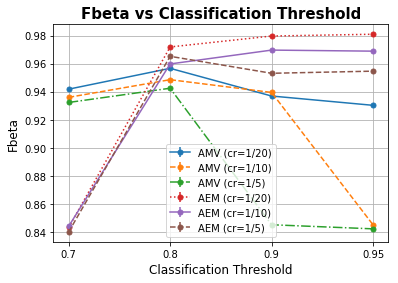

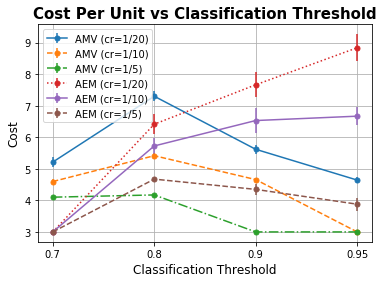

In [59]:
columns_to_print = ['fbeta']
url_to_save_plt = "./charts/fbeta_adaptive_comparisson"

titles = ['Fbeta vs Classification Threshold']

plot_elems_lines(elems, thresholds, columns_to_print, "Classification Threshold", xticks_names, url_to_save_plt, titles)

columns_to_print = ['cost']
url_to_save_plt = "./charts/cost_adaptive_comparisson"
titles = ['Cost Per Unit vs Classification Threshold']
loc = 'upper left'
plot_elems_lines(elems, thresholds, columns_to_print, "Classification Threshold", xticks_names, url_to_save_plt, titles, loc)

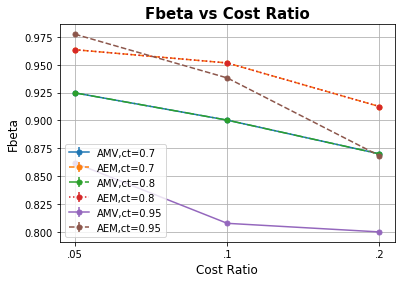

In [60]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.1

adaptive_mv_70 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['threshold'] == 0.8]
adaptive_mv_70 = adaptive_mv_70.sort_values(by=['cost_ratio'])

adaptive_bayes_70 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['threshold'] == 0.8]
adaptive_bayes_70 = adaptive_bayes_70.sort_values(by=['cost_ratio'])

adaptive_mv_80 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['threshold'] == 0.8]
adaptive_mv_80 = adaptive_mv_80.sort_values(by=['cost_ratio'])

adaptive_bayes_80 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['threshold'] == 0.8]
adaptive_bayes_80 = adaptive_bayes_80.sort_values(by=['cost_ratio'])

adaptive_mv_95 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['threshold'] == 0.95]
adaptive_mv_95 = adaptive_mv_95.sort_values(by=['cost_ratio'])

adaptive_bayes_95 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['threshold'] == 0.95]
adaptive_bayes_95 = adaptive_bayes_95.sort_values(by=['cost_ratio'])

#datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20, adaptive_bayes_5, adaptive_bayes_10, adaptive_bayes_20]
elems = [
         adaptive_mv_70,
         adaptive_bayes_70,
         adaptive_mv_80,
         adaptive_bayes_80,
         adaptive_mv_95,
         adaptive_bayes_95
        ]

items = 3
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 0

xticks_names = ('AMV,ct=0.7','AEM,ct=0.7','AMV,ct=0.8','AEM,ct=0.8','AMV,ct=0.95','AEM,ct=0.95')
               
thresholds = ['.05', '.1', '.2']    
    
columns_to_print = ['fbeta']
url_to_save_plt = "./charts/cost_impact_lines"
titles = ['Fbeta vs Cost Ratio']
loc = 'upper left'
plot_elems_lines(elems, thresholds, columns_to_print, "Cost Ratio", xticks_names, url_to_save_plt, titles)



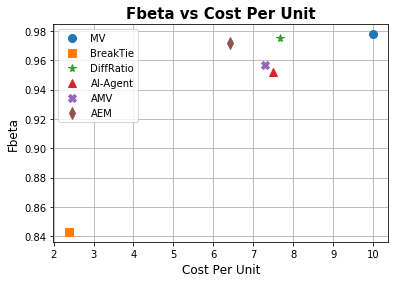

[10.0, 2.3769999999999993, 7.6574800000000005, 7.493999999999999, 7.2989999999999995, 6.412999999999999]
[0.9777639493880936, 0.8429229010426194, 0.975320317759526, 0.952115036049462, 0.9566314937830012, 0.9718842719371352]


In [61]:
data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie_full_metrics.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied_full_metrics.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results_full_metrics.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal][data_mv['votes']==10]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold']==0.8]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold']==0.8]

#data[column_mean]/data['cost_ratio'][0]/items_num
elems = [mv, tie, abraham, agenthunt, adaptive_mv, adaptive_bayes]

legends = ('MV', 'BreakTie', 'DiffRatio', 'AI-Agent', 'AMV', 'AEM')

x_values = []
y_values = []
for elem in elems:
    x_values.append(elem['cost'].iloc[0]/0.05/1000)
    y_values.append(elem['fbeta'].iloc[0])
    
    
from itertools import cycle
import matplotlib.pyplot as plt

lines = ["-", "--", "-.", ":"]
markers = ['o', 's', '*', '^', 'X', 'd']

linecycler = cycle(lines)
markercycler = cycle(markers)

columns_to_print = ['fbeta']
url_to_save_plt = "./charts/comparisson_fbeta_vs_cost_all"

titles = ['Fbeta vs Cost']



for key, x_elem in enumerate(x_values):
    plt.plot(x_elem, y_values[key], 
             linestyle='None',
             marker=next(markercycler), 
             markersize=8)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(legends)
plt.xlabel('Cost Per Unit', fontsize=12)
plt.ylabel('Fbeta', fontsize=12)
plt.title('Fbeta vs Cost Per Unit', fontsize=15, fontweight="bold")
    
plt.grid()

plt.savefig('./charts/fbeta_cost_all_comparisson.jpg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

print(x_values)
print(y_values)


### AEM on real world datasets


| name | items | votes | workers | accuracy AVG | data balance |
|------|-------|-------|---------|--------------|------------- |
|'HITspam'| 101| 42762| 150| 69 %| 'No': 0.69, 'Yes': 0.31}|
|'WVSCM'| 160| 30319| 17| 65.7 %| 1: 0.36| 0: 0.64}|
|'WaterBird1'| 108| 4212| 39| 63.5 %| 1: 0.44, 0: 0.56}|
|'TlkAgg2'| 10079| 475536| 7054| 63.3 %| 0: 0.60, 1: 0.40}|
|'Div150Multi'| 3532| 90260| 1434| 61 %| 'Yes': 0.52, 'No': 0.48}|
|'HC-TREC-2011'| 1000| 167580| 10| 62 %| 1: 0.5, 0: 0.5}|

In [83]:
datasets = [
            {'name':'HITspam', 'gt_file':'gold.txt','votes_file':'labels.txt', 'gt_index_item': 0, 'gt_index_value': 1, 'votes_index_worker': 0, 
             'votes_index_item': 1, 'votes_index_vote': 2, 'delimiter':'\t', 'header':None},
            {'name':'WVSCM', 'gt_file':'groundTruth.txt','votes_file':'labels.txt', 'gt_index_item': 0, 'gt_index_value': 1, 'votes_index_worker': 0, 
             'votes_index_item': 1, 'votes_index_vote': 2, 'delimiter':'\t', 'header':None},  
            {'name':'WaterBird1', 'gt_file':'gt.txt','votes_file':'labels.txt', 'gt_index_item': 0, 'gt_index_value': 1, 'votes_index_worker': 0, 
             'votes_index_item': 1, 'votes_index_vote': 2, 'delimiter':'\t', 'header':None}, 
            #{'name':'TlkAgg2', 'gt_file':'golden_labels.tsv','votes_file':'crowd_labels.tsv', 'gt_index_item': 0, 'gt_index_value': 1, 
            # 'votes_index_worker': 0, 'votes_index_item': 1, 'votes_index_vote': 2, 'delimiter':'\t', 'header':None},
            #{'name':'Div150Multi', 'gt_file':'mediaEval1Q1_Gold.txt','votes_file':'mediaEvalQ1_Responses.txt', 'gt_index_item': 0, 'gt_index_value': 1, 'votes_index_worker': 0, 
            # 'votes_index_item': 1, 'votes_index_vote': 2, 'delimiter':' ', 'header':None},
            #{'name':'HC-TREC-2011', 'gt_file':'trec2011Task2_Gold.txt','votes_file':'trec2011Task2_Responses.txt', 'gt_index_item': 0, 
            # 'gt_index_value': 1, 'votes_index_worker': 0, 'votes_index_item': 1, 'votes_index_vote': 2, 'delimiter':' ', 'header':None}
           ]

adaptive = pd.read_csv('./results/adaptive_em/results.csv')


In [85]:
ths = adaptive.threshold.unique()
crs = adaptive.cost_ratio.unique()
items = adaptive.num_items.unique()
bals = adaptive.data_bal.unique()
fncs = adaptive.fnc.unique()
fpcs = adaptive.fpc.unique()
uccs = adaptive.ucc.unique()


print(f" Parameters:\n  Classification Thresholds: {ths}\n  Cost Ratios: {crs}\n  #Items: {items}\n  Data Balances: {bals}\n \
 FNC: {fncs}\n  FPC: {fpcs}\n  UCC: {uccs}\n")

 Parameters:
  Classification Thresholds: [0.7  0.8  0.9  0.95]
  Cost Ratios: [0.1  0.05 0.02 0.01]
  #Items: [  101   160   108 10079]
  Data Balances: [0.30693069 0.3625     0.44444444 0.40490128]
  FNC: [1]
  FPC: [1]
  UCC: [1]



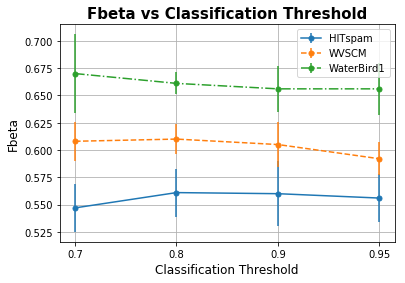

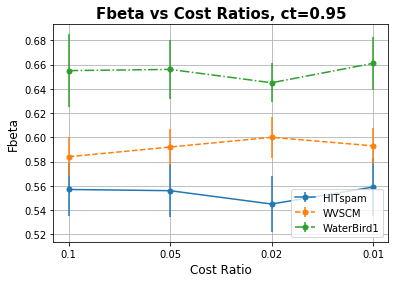

In [62]:
cr = 0.05
names = []
elems = []
for dataset in datasets:
    dt_result = adaptive[adaptive['dataset'] == dataset['name']][adaptive['cost_ratio'] == cr]
    names.append(dataset['name'])
    elems.append(dt_result)

             
thresholds = adaptive.threshold.unique()
    
columns_to_print = ['fbeta']
url_to_save_plt = "./charts/adaptive_real_world_results_ct"
titles = ['Fbeta vs Classification Threshold']

plot_elems_lines(elems, thresholds, columns_to_print, "Classification Threshold", names, url_to_save_plt, titles)

ct = 0.95
names = []
elems = []
for dataset in datasets:
    dt_result = adaptive[adaptive['dataset'] == dataset['name']][adaptive['threshold'] == ct]
    names.append(dataset['name'])
    elems.append(dt_result)


thresholds = adaptive.cost_ratio.unique()
    
columns_to_print = ['fbeta']
url_to_save_plt = "./charts/adaptive_real_world_results_cr"
titles = ['Fbeta vs Cost Ratios, ct=0.95']

plot_elems_lines(elems, thresholds, columns_to_print, "Cost Ratio", names, url_to_save_plt, titles)


# Old results

## MV Fixed votes

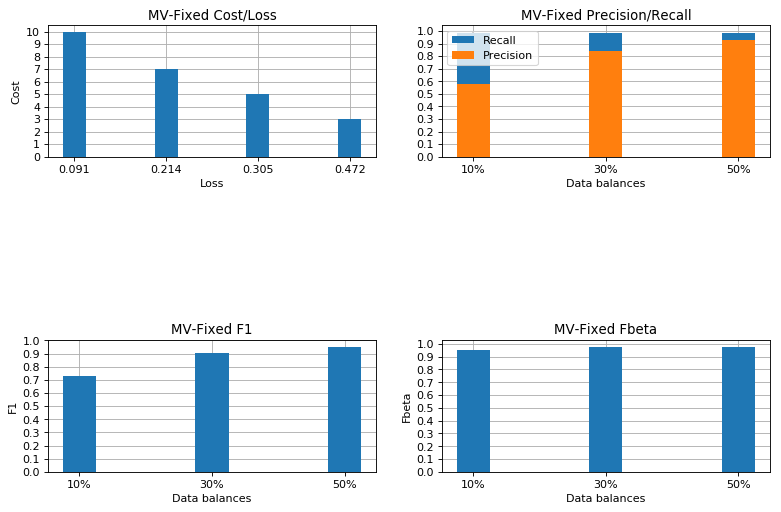

In [33]:
data = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')



plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
width = 0.05       # the width of the bars: can also be len(x) sequence


plt.subplot(431)
ind = [.2, .4, .6, .8]
#balanced dataset, diff #votes
smv_05 = data[data['class_fn']=='majority_voting'][data['data_bal']==0.5][data['cost_ratio']==0.05].iloc[::-1]
cost_mean = smv_05["cost"]/smv_05["cost_ratio"]/1000
cost_std = smv_05["cost_std"]/smv_05["cost_ratio"]/1000

p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3)
loss_mean = smv_05["loss"]
loss_std = smv_05["loss_std"]
plt.title('MV-Fixed Cost/Loss')
plt.ylabel("Cost")
plt.xlabel("Loss")
plt.xticks(ind, [round(x, 3) for x in smv_05['loss']])
plt.yticks(np.arange(0,11,1))
plt.grid(zorder=0)


#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(432)
ind = [.5, .3, .1]
precision_mean = smv_05["precision"]
precision_std = smv_05["precision_std"]
recall_mean = smv_05["recall"]
recall_std = smv_05["recall_std"]
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3)
p2 = plt.bar(ind, precision_mean, width, yerr=precision_std, zorder=3)
plt.title('MV-Fixed Precision/Recall')
#plt.ylabel("Cost")
plt.xlabel("Data balances")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'))
plt.xticks(ind, ['50%', '30%', '10%'])
plt.yticks(np.arange(0,1.1,.1))
plt.grid(zorder=0)


#f1
#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(437)
ind = [.5, .3, .1]
f1_mean = smv_05["f1"]
f1_std = smv_05["f1_std"]
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3)
plt.title('MV-Fixed F1')
plt.ylabel("F1")
plt.xlabel("Data balances")
plt.xticks(ind, ['50%', '30%', '10%'])
plt.yticks(np.arange(0,1.1,.1))
plt.grid(zorder=0)

#f1
#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(438)
ind = [.5, .3, .1]
fbeta_mean = smv_05["fbeta"]
fbeta_std = smv_05["fbeta_std"]
p1 = plt.bar(ind, fbeta_mean, width, yerr=fbeta_std, zorder=3)
plt.title('MV-Fixed Fbeta')
plt.ylabel("Fbeta")
plt.xlabel("Data balances")
plt.xticks(ind, ['50%', '30%', '10%'])
plt.yticks(np.arange(0,1.1,.1))
plt.grid(zorder=0)

plt.show()

## Comparison fixed-adaptive

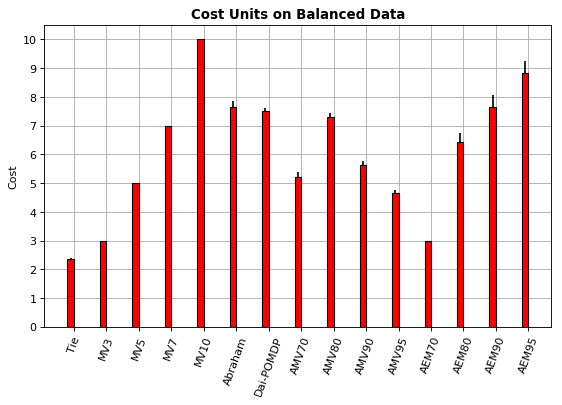

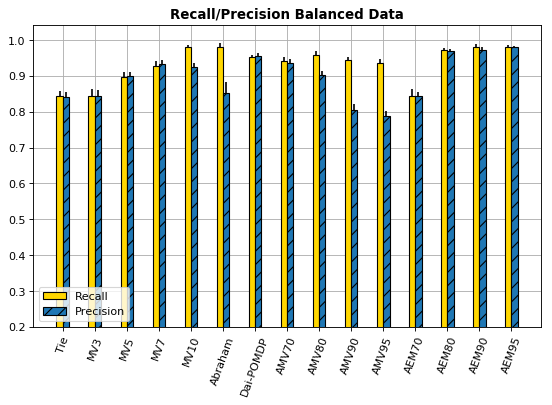

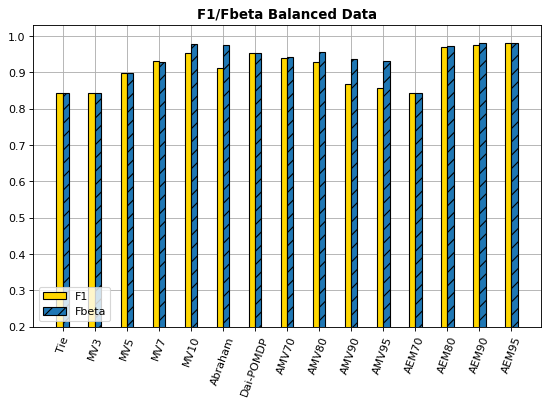

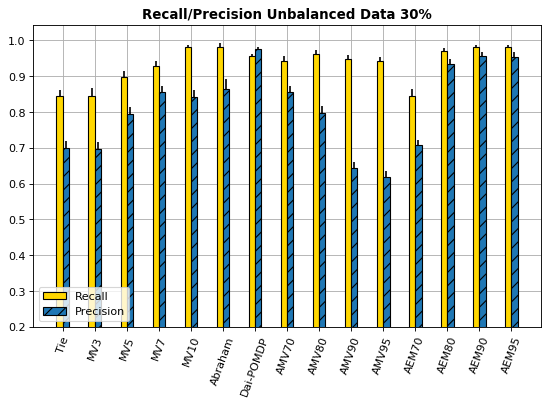

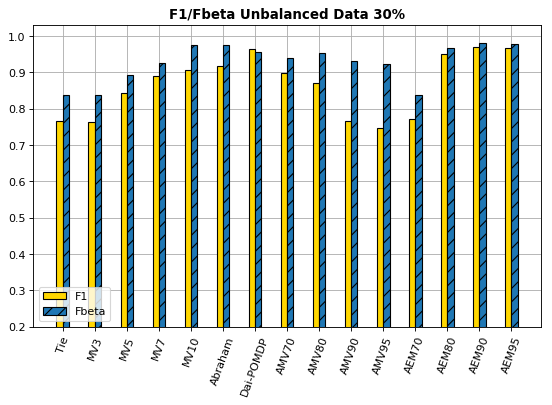

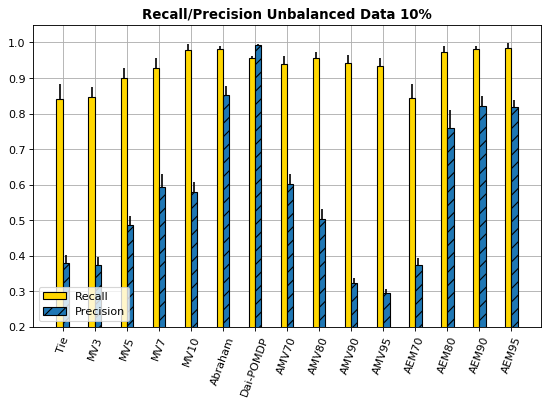

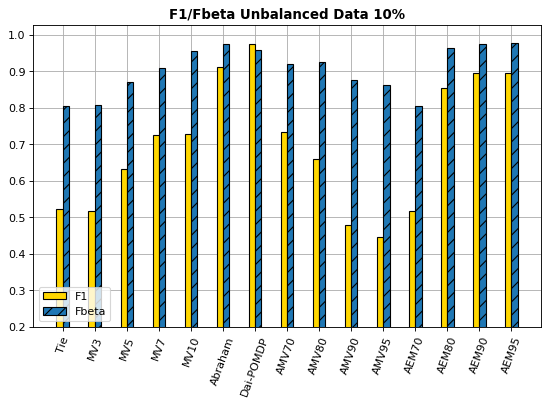

In [38]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie_full_metrics.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied_full_metrics.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results_full_metrics.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

abraham_c = 2
abraham_e = 0.2


cr = 0.05

data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

items = 15
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'Dai-POMDP', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

#Balanced dataset
#1)
plt.subplot(221)
cost_mean, cost_std = get_approaches_results(datasets_print, "cost", "cost_std")

p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3, color='red', edgecolor='black')
plt.ylabel('Cost')
plt.title('Cost Units on Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,11,1))
plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/balanced_data_quality", bbox_inches = 'tight', pad_inches = 0)
#plt.show()

#2.1) F1 - FBETA
plt.figure(num=22, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std")
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std")
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, fbeta_mean, width, yerr=fbeta_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title('F1/Fbeta Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
#plt.savefig("./charts/balanced_data_quality_f1_fbeta", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

data_bal = 0.3
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_30_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#3.1) F1 - FBETA
plt.figure(num=32, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std")
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std")
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, fbeta_mean, width, yerr=fbeta_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title('F1/Fbeta Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_30_quality_f1_fbeta", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

data_bal = 0.1
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_10_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#4.1) F1 - FBETA
plt.figure(num=42, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std")
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std")
p1 = plt.bar(ind, f1_mean, width, yerr=f1_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, fbeta_mean, width, yerr=fbeta_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title('F1/Fbeta Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_10_quality_f1_fbeta", bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Cost impact .2 (1:5) vs .1 (1:10) vs .05 (1:20)

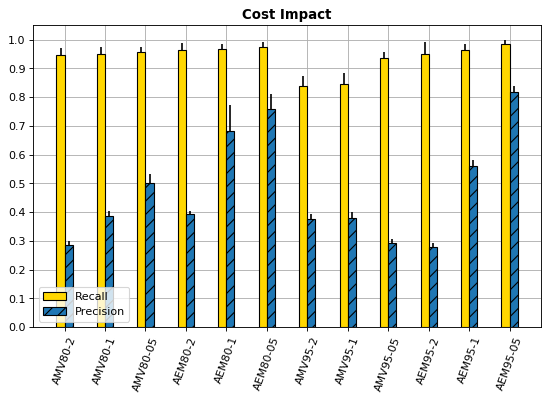

In [39]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.1

ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]
adaptive_bayes_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]

adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]
adaptive_bayes_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]

adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]
adaptive_bayes_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20, adaptive_bayes_5, adaptive_bayes_10, adaptive_bayes_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = (
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AEM80-2', 'AEM80-1', 'AEM80-05', \
                'AMV95-2','AMV95-1', 'AMV95-05', \
                'AEM95-2','AEM95-1', 'AEM95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

## Loss

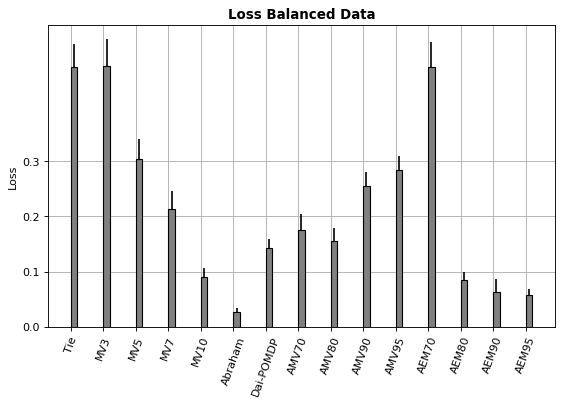

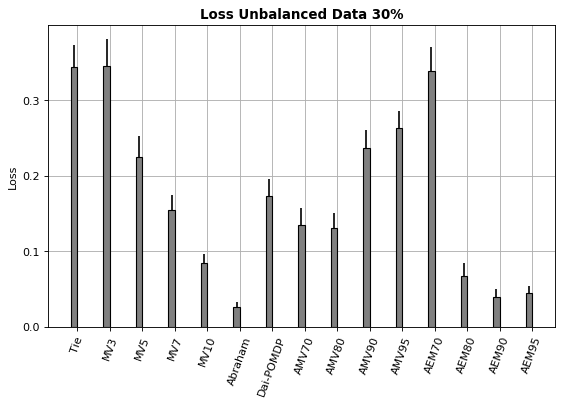

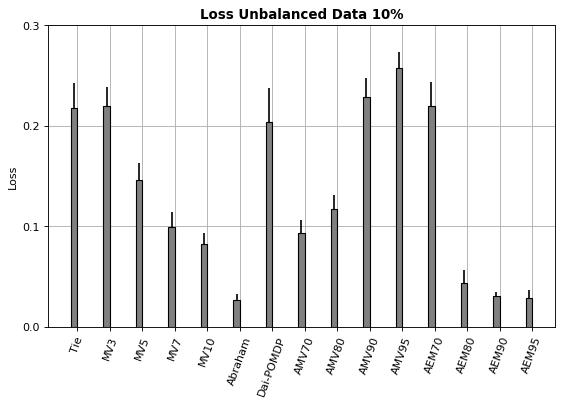

In [40]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv_full_metrics.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie_full_metrics.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied_full_metrics.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results_full_metrics.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

abraham_c = 2
abraham_e = 0.2

items = 15
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'Dai-POMDP', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

#plot
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]


#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p2 = plt.bar(ind+width, loss_mean, width, yerr=loss_std, zorder=3, edgecolor='black', color='grey')
plt.title('Loss Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.ylabel('Loss')
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_balanced", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_bal = 0.3
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_unbalanced_30", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_bal = 0.1
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))

plt.savefig("./charts/loss_unbalanced_10", bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Adaptative MV over ths and crs

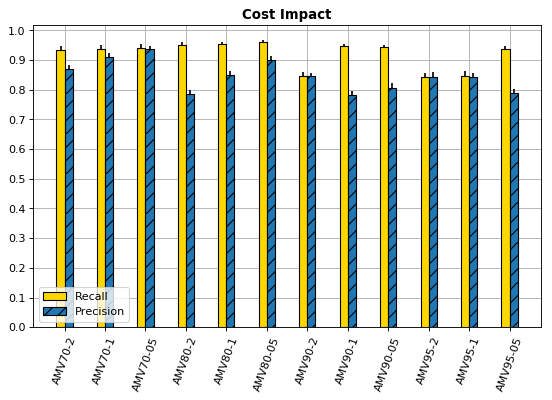

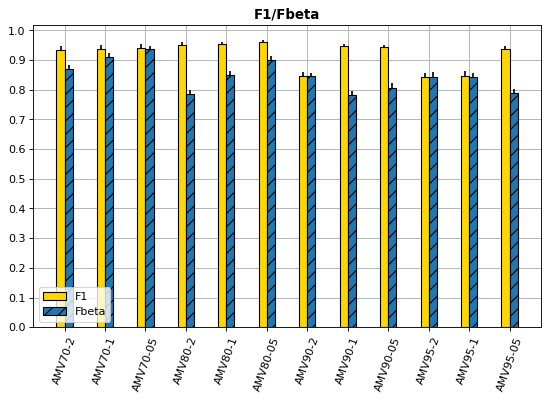

In [41]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive_full_metrics.csv')

data_bal = 0.5

#ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]#[adaptive['threshold'].isin(ths)]
adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]#[adaptive['threshold'].isin(ths)]
adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]#[adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('AMV70-2', 'AMV70-1', 'AMV70-05', \
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AMV90-2', 'AMV90-1', 'AMV90-05', \
                'AMV95-2','AMV95-1', 'AMV95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
#plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)

plt.figure(num=72, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(222)
plt.grid(zorder=0)
f1_mean, f1_std = get_approaches_results(datasets_print, "f1", "f1_std", True)
fbeta_mean, fbeta_std = get_approaches_results(datasets_print, "fbeta", "fbeta_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('F1', 'Fbeta'), loc=3)
plt.title("F1/Fbeta", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
#plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

### Table of summarized results

In [54]:
#simulated datasets
sm_data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')
sm_data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie.csv')
sm_data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied.csv')
sm_data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results.csv')
sm_adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

#real world datasets
rw_data_mv = pd.read_csv('./results/real_world/all_mv.csv')
rw_data_tie = pd.read_csv('./results/real_world/all_break_tie.csv')
rw_data_abraham = pd.read_csv('./results/real_world/all_abraham.csv')
rw_data_agenthunt = pd.read_csv('./results/agenthunt/real_world_results.csv')
rw_adaptive = pd.read_csv('./results/real_world/all_adaptive.csv')

approaches = {'Tie':{}, 'MV3':{}, 'MV5':{}, 'MV7':{}, 'MV10':{}, 'Abraham':{}, 'Dai-POMDP':{}, 
        'AMV70':{}, 'AMV80':{}, 'AMV90':{}, 'AMV95':{}, 'AEM70':{}, 'AEM80':{}, 'AEM90':{}, 'AEM95':{}}

loss_column = 'loss'
recall_column = 'recall'
precision_column = 'precision'
cost_column = 'cost'

approaches['Tie'][loss_column] = get_total_results(sm_data_tie, rw_data_tie, loss_column)
approaches['Tie'][recall_column] = get_total_results(sm_data_tie, rw_data_tie, recall_column)
approaches['Tie'][precision_column] = get_total_results(sm_data_tie, rw_data_tie, precision_column)
approaches['Tie'][cost_column] = get_total_results(sm_data_tie, rw_data_tie, cost_column)

approaches['MV3'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 3)
approaches['MV3'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 3)
approaches['MV3'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 3)
approaches['MV3'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 3)

approaches['MV5'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 5)
approaches['MV5'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 5)
approaches['MV5'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 5)
approaches['MV5'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 5)

approaches['MV7'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 7)
approaches['MV7'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 7)
approaches['MV7'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 7)
approaches['MV7'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 7)

approaches['MV10'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 10)
approaches['MV10'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 10)
approaches['MV10'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 10)
approaches['MV10'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 10)

abraham_c = 2
abraham_e = 0.2
approaches['Abraham'][loss_column] = get_total_results(sm_data_abraham, rw_data_abraham, loss_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][recall_column] = get_total_results(sm_data_abraham, rw_data_abraham, recall_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][precision_column] = get_total_results(sm_data_abraham, rw_data_abraham, precision_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][cost_column] = get_total_results(sm_data_abraham, rw_data_abraham, cost_column, None, None, None, None, None, abraham_c, abraham_e)

approaches['Dai-POMDP'][loss_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, loss_column)
approaches['Dai-POMDP'][recall_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, recall_column)
approaches['Dai-POMDP'][precision_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, precision_column)
approaches['Dai-POMDP'][cost_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, cost_column)

cost_ratio = 0.05
decision_function_mv = 'decision_function_mv'
threshold = 0.7
approaches['AMV70'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.8
approaches['AMV80'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.9
approaches['AMV90'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.95
approaches['AMV95'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

class_fn = 'majority_voting'
decision_function_mv = 'decision_function_bayes'
threshold = 0.7
approaches['AEM70'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.8
approaches['AEM80'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.9
approaches['AEM90'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.95
approaches['AEM95'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

recalls_mean = [np.mean(approach[recall_column]) for key, approach in approaches.items()]
precision_mean = [np.mean(approach[precision_column]) for key, approach in approaches.items()]
quality_mean = []
for key in range(len(recalls_mean)):
    quality_mean.append((recalls_mean[key] + precision_mean[key]) / 2)

data = pd.DataFrame({
    'Approach': list(approaches.keys()),
    'Cost': [float(str(np.mean(approach[cost_column]))[:5]) for key, approach in approaches.items()],
    'Loss': [float(str(np.mean(approach[loss_column]))[:5]) for key, approach in approaches.items()],
    'Recall': [float(str(val)[:5]) for val in recalls_mean],
    'Precision': [float(str(val)[:5]) for val in precision_mean],
    'Quality Mean': [float(str(val)[:5]) for val in quality_mean]
}).sort_values(['Recall', 'Precision', 'Cost', 'Loss'], ascending=False).style.highlight_max(color='yellow',axis=0).highlight_min(color='lightblue',axis=0).hide_index()

data

Approach,Cost,Loss,Recall,Precision,Quality Mean
AEM90,270.1,0.072,0.974,0.922,0.948
AEM95,311.1,0.072,0.972,0.927,0.95
Abraham,264.9,0.065,0.971,0.91,0.94
MV10,345.1,0.12,0.971,0.82,0.895
AEM80,210.9,0.14,0.947,0.891,0.919
Dai-POMDP,270.6,0.236,0.933,0.96,0.946
AMV80,279.7,0.241,0.914,0.748,0.831
MV7,241.6,0.216,0.911,0.833,0.872
AMV90,228.2,0.307,0.903,0.662,0.782
AMV70,216.2,0.243,0.901,0.787,0.844
